# AURA+ — Exploratory Data Analysis (EDA)

**Project:** AURA+  
**Goal:** Analyze factors influencing mental health stress levels and prepare insights
for a machine learning–based stress risk prediction system.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("../data/processed/stress_clean.csv")
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_relationship,career_concerns,social_support,peer_pressure,extracurriculars,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,1,5,1


## Dataset Overview

The dataset contains responses from **1,100 individuals** with **21 features**
covering psychological, academic, social, and environmental factors.
The target variable is **stress_level**, categorized into:

- 0 → Low Stress
- 1 → Moderate Stress
- 2 → High Stress

In [10]:
df.shape, df.columns.tolist()

((1100, 21),
 ['anxiety_level',
  'self_esteem',
  'mental_health_history',
  'depression',
  'headache',
  'blood_pressure',
  'sleep_quality',
  'breathing_problem',
  'noise_level',
  'living_conditions',
  'safety',
  'basic_needs',
  'academic_performance',
  'study_load',
  'teacher_relationship',
  'career_concerns',
  'social_support',
  'peer_pressure',
  'extracurriculars',
  'bullying',
  'stress_level'])

### Target distribution

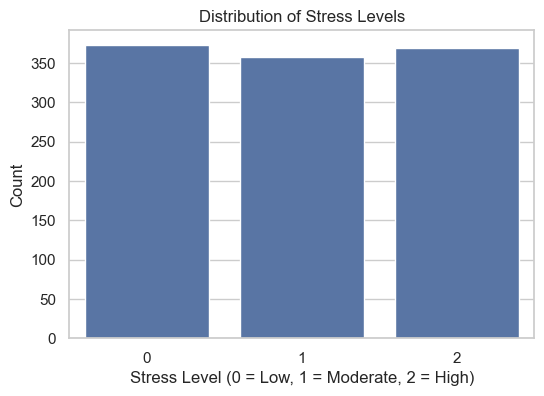

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="stress_level", data=df)
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level (0 = Low, 1 = Moderate, 2 = High)")
plt.ylabel("Count")
plt.show()

### Insight
The target variable is **well balanced** across all three stress categories.
This is ideal for multi-class classification, as it reduces bias toward any
single stress level during model training.

### Key psychological factors vs stress level

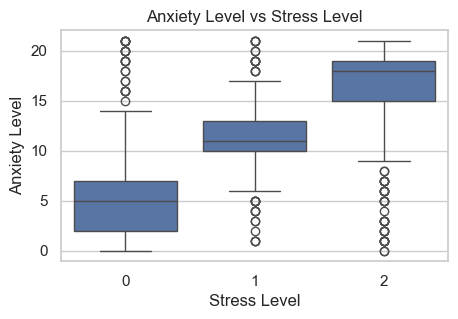

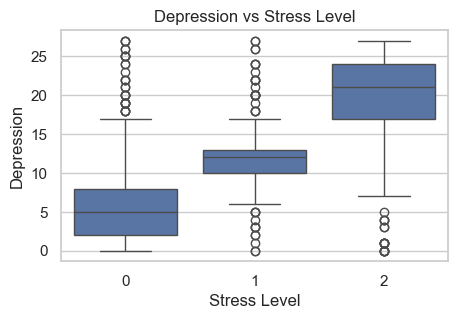

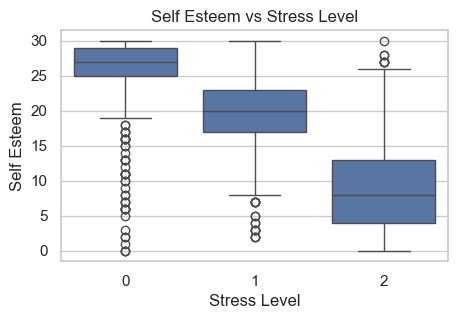

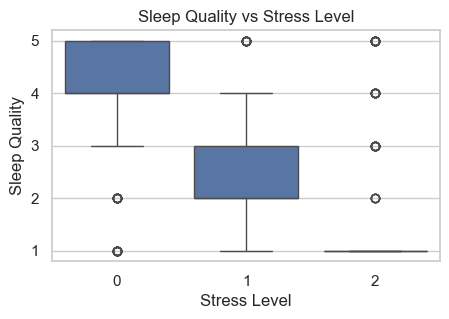

In [18]:
key_psych_features = [
    "anxiety_level",
    "depression",
    "self_esteem",
    "sleep_quality"
]

for col in key_psych_features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x="stress_level", y=col, data=df)
    plt.title(f"{col.replace('_', ' ').title()} vs Stress Level")
    plt.xlabel("Stress Level")
    plt.ylabel(col.replace("_", " ").title())
    plt.show()

### Insight
Higher stress levels are associated with:
- Increased anxiety and depression scores
- Lower self-esteem
- Poorer sleep quality

These patterns align with established psychological research,
supporting the validity of the dataset.


### Social & academic pressure analysis

### Correlation heatmap 

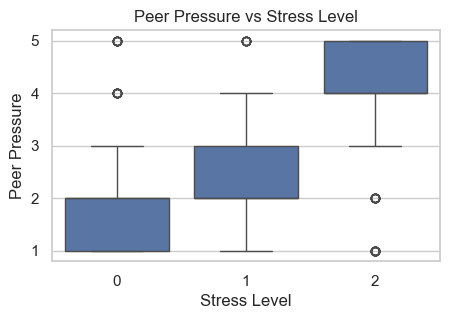

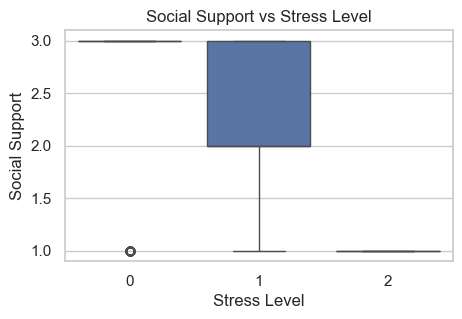

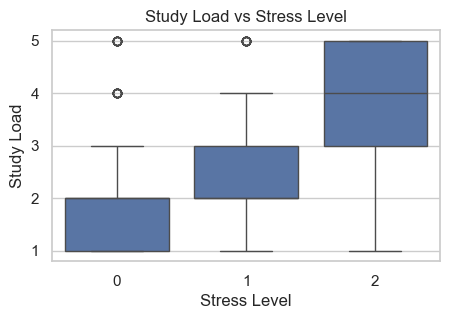

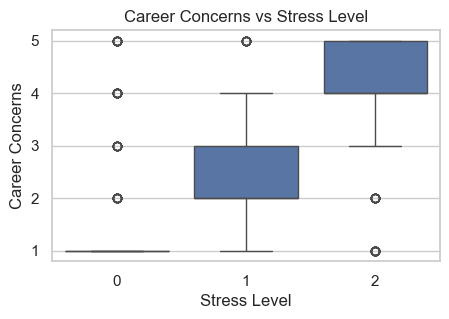

In [17]:
social_features = [
    "peer_pressure",
    "social_support",
    "study_load",
    "career_concerns"
]

for col in social_features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x="stress_level", y=col, data=df)
    plt.title(f"{col.replace('_', ' ').title()} vs Stress Level")
    plt.xlabel("Stress Level")
    plt.ylabel(col.replace("_", " ").title())
    plt.show()


### Insight
Social and academic factors play a significant role in stress levels.
Higher stress is strongly associated with increased peer pressure,
study load, and career-related concerns, while social support
tends to decrease as stress increases.

### Correlation heatmap

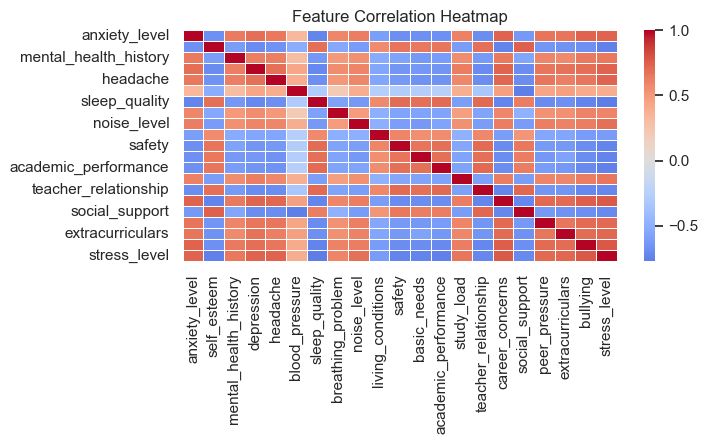

In [15]:
plt.figure(figsize=(7,3))
sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap")
plt.show()


### Insight
Strong positive correlations with stress level include anxiety,
depression, peer pressure, and career concerns.
Negative correlations include social support, safety,
and basic needs satisfaction.

These relationships guide feature selection for model training.

## EDA Summary

Key findings from exploratory analysis:
- Stress levels are influenced by a combination of psychological,
  academic, and social factors.
- Anxiety, depression, and peer pressure are among the strongest
  positive indicators of high stress.
- Social support and safety act as protective factors.